In [4]:
import pandas as pd
import seaborn as sns
import numpy as np

In [117]:
hmr={}
for cell in ['b','cd3','cd4','cd8','gran','mono','nk','merge']:
    b=pd.read_table('data/hmr/'+cell+'.sub',header=None,usecols=[1,2])
    hmr[cell]=(b[2]-b[1]).sum()/(3.2*10**9)

In [118]:
df=pd.DataFrame.from_dict(hmr,orient='index',columns=['Hypomethylated'])

<Axes: >

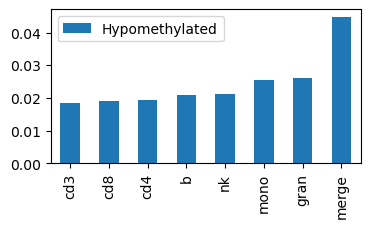

In [119]:
df.sort_values('Hypomethylated').plot(kind='bar',figsize=(4,2))

In [120]:
df.T['merge'].values[0].round(3)

0.045

In [125]:
array450_='https://github.com/zhou-lab/InfiniumAnnotationV1/raw/main/Anno/HM450/HM450.hg38.manifest.tsv.gz'
array450=pd.read_table(array450_,index_col='Probe_ID',usecols=['Probe_ID','CpG_chrm','CpG_beg'])

In [126]:
array450_chr=array450.groupby('CpG_chrm')['CpG_beg'].apply(list)
wb='https://ftp.ncbi.nlm.nih.gov/geo/series/GSE41nnn/GSE41169/matrix/GSE41169_series_matrix.txt.gz'
wb=pd.read_table(wb,skiprows=72,index_col=0)

In [4]:
wb=wb.mean(1)

In [80]:
def f(c,b,e):
    ins=[]
    for c in man[c]:
        if c > b and c<e:
            ins.append(b)
    return len(ins)
def wbm(c,b,e):
    ins=[]
    for i in man[c]:
        if i > b and i<e:
            ins.append(wb.loc[mn[(mn['CpG_chrm']==c)&(mn['CpG_beg']==i)].index].values[0])
    return np.mean(ins)

In [39]:
b=pd.read_table('data/hmr/cd4.al',header=None)
b[b[0]=='chr12'][b[3]>20].head(20)

/tmp/ipykernel_42921/345480808.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  b[b[0]=='chr12'][b[3]>20].head(20)


,0,1,2,3,4,5,6,7
217,chr12,55934975,55936787,42,42,0.17,0.77,0.60
261,chr12,132286000,132286666,51,17,0.17,0.76,0.59
450,chr12,6444250,6447148,36,36,0.13,0.70,0.56
749,chr12,122006312,122006943,25,25,0.09,0.62,0.53
872,chr12,9667501,9675485,74,74,0.09,0.62,0.52
1236,chr12,123074957,123076998,38,38,0.17,0.66,0.49
1683,chr12,131105756,131106330,27,27,0.12,0.58,0.46
1845,chr12,7640244,7641239,34,34,0.15,0.60,0.45
2361,chr12,47832347,47833637,32,32,0.17,0.59,0.42
3118,chr12,122244064,122245512,26,26,0.34,0.72,0.38


In [26]:
b=pd.read_table('data/hmr/b.all',header=None)
b[b[4]>.5].dropna().sort_values(10).tail(20).head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
28239,chr17,63930019,63933477,HYPO55806,0.565131,+,0.565131,0.499866,0.518072,83,83,58005,102640
31288,chr19,3172402,3174871,HYPO58885,0.871248,+,0.871248,0.888217,1.000000,86,86,37353,42873
65978,chr9,137429100,137431085,HYPO33174,0.852341,+,0.852341,0.865268,0.976744,86,86,58145,68218
62986,chr8,143515296,143517612,HYPO29997,0.524367,+,0.524367,0.506541,0.476744,86,86,59190,112879
62724,chr8,140098287,140099533,HYPO29735,0.546707,+,0.546707,0.546977,0.931034,87,87,62873,115003
36589,chr2,88855974,88863228,HYPO8319,0.868769,+,0.868769,0.870245,0.977778,90,90,167986,193361
66693,chrX,47619491,47620417,HYPO68866,0.504010,+,0.504010,0.515011,0.576087,92,92,25701,50993
9974,chr11,2384107,2386520,HYPO36909,0.717020,+,0.717020,0.720697,0.819149,94,94,78718,109785
42965,chr22,22117333,22118624,HYPO66559,0.566667,+,0.566667,0.509296,0.463158,95,95,34361,60637
48088,chr4,3040237,3042285,HYPO14695,0.520908,+,0.520908,0.456458,0.364583,96,96,59806,114811


In [ ]:
b=pd.read_csv('data/hmr/gran.a',header=None)
b.shape
b['b']=b[[4,5]].min(1)
b['d']=b['b']-b[6]
top=b.sort_values('d',ascending=False).head(500)
top['man']=top[[0,1,2]].apply(lambda x: f(x[0],x[1],x[2]),axis=1)